# Data processing
The intention of this notebook is to load data, and transform it into spikes for later training of a SNN

In [22]:
import torch
import snntorch as snn
from torchvision import datasets, transforms
from snntorch import spikegen

In [2]:
tr = transforms.Compose([
    transforms.Resize((105,105)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0,),(1,))
])

data = datasets.ImageFolder("Japanese_(katakana)",transform=tr)

In [13]:
from torch.utils.data import DataLoader

In [14]:
dl = DataLoader(data,batch_size=1)

In [15]:
d = iter(dl)
dlt, tit = next(d)

In [35]:
dlt1 = dlt.clone()

In [36]:
dlt1[dlt1==0] = 2

In [38]:
dlt1[dlt1==1] = 0

In [40]:
dlt1[dlt1== 2] = 1

In [18]:
import matplotlib.pyplot as plt

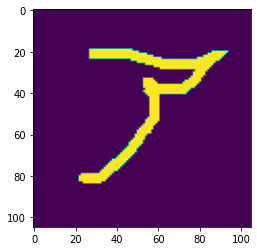

In [42]:
plt.imshow(dlt1[0,0])

In [49]:
s = spikegen.rate(dlt1,num_steps=250,gain=0.5)

In [50]:
s.shape

torch.Size([250, 1, 1, 105, 105])

In [51]:
x = s[:,0,0]

In [47]:
import snntorch.spikeplot as splt

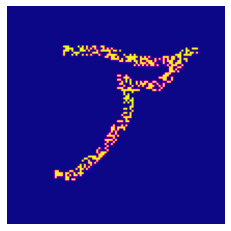

In [53]:
f,a = plt.subplots()
anim = splt.animator(x,f,a)
anim.save("test.mp4")

In [57]:
d2 = spikegen.latency(dlt1,num_steps=250,tau=5,threshold=0.001)

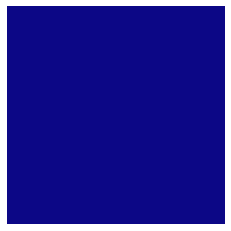

In [58]:
f,a = plt.subplots()
anim = splt.animator(d2[:,0,0],f,a)
anim.save("tes1t.mp4")

In [63]:
d3 = spikegen.delta(dlt1,threshold=4)

In [64]:
d3.shape

torch.Size([1, 1, 105, 105])

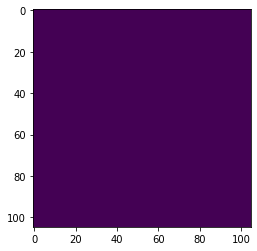

In [65]:
plt.imshow(d3[0,0])